In [131]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

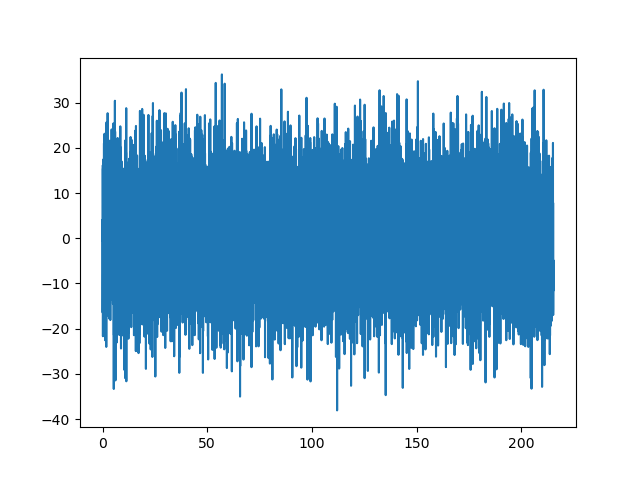

In [219]:
hoursPerDay     = 23.9344696 # sidereal time
numDays         = 9
acqPeriod_days  = 1/(60 * hoursPerDay) 
mod_period      = hoursPerDay #period of modulation due to earth, not measured modulation
time_arr        = np.arange(0, hoursPerDay*numDays, 1/60)
numTimeSteps    = len(time_arr)

noiseStd        = 10
a               = 0 #dimentionless depth of modulation parameter. note 0 is on, 1 is off
signalPhase     = .123 * 2 * np.pi

noise           = np.random.normal(0, noiseStd, numTimeSteps)
#this model of the signal is a dumb first pass and should be fixed
signal          = 1 - ((1 - a)*(np.cos(2*np.pi/mod_period * time_arr + signalPhase))**2)
noisySignal     = signal + noise


#crerate test signal
time_arr_test   = np.arange(0, hoursPerDay*numDays, 1/60)

testSignal          = (np.cos(2*np.pi/mod_period * time_arr_test + signalPhase))**2


plt.close('all')
plt.plot(time_arr, noisySignal)
#plt.plot(time_arr_test, testSignal)
plt.show()


Text(0.5, 1.0, 'test and noisy sig')

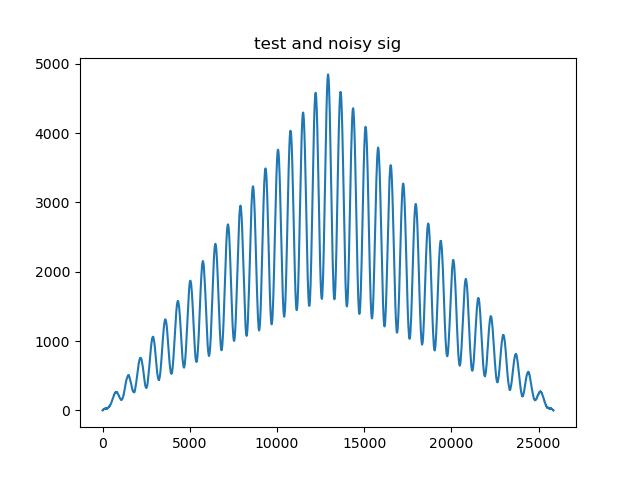

In [211]:
conv = np.convolve(testSignal, noisySignal, mode='full')

plt.close('all')
plt.plot(conv)
plt.title('test and noisy sig')


[0.00000000e+00 7.73694391e-05 1.54738878e-04 ... 4.99729207e-01
 4.99806576e-01 4.99883946e-01]


/var/folders/5z/rg0q4x2x5gl_n4zhlnzrcgxh0000gn/T/ipykernel_31154/2864518249.py:6: RuntimeWarning: divide by zero encountered in true_divide
  period_min          = 1/freqs_inverseMin


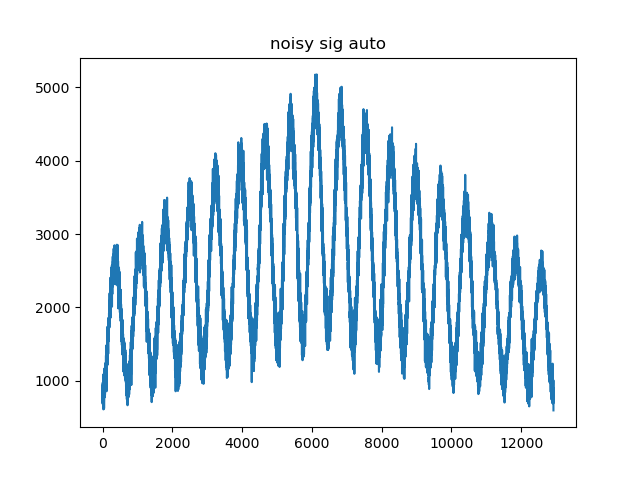

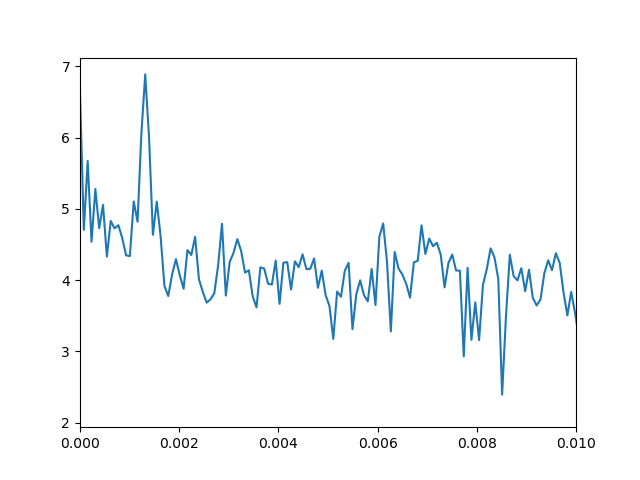

In [212]:
conv                = np.convolve(noisySignal, noisySignal, mode='same')

freqs_inverseMin    = np.arange(0,hoursPerDay*9*60, 1/len(conv))
freqs_inverseMin    = np.asarray(range(len(conv)//2)) * 1/len(conv)

period_min          = 1/freqs_inverseMin
print(freqs_inverseMin)

plt.close('all')
plt.figure()
plt.plot(conv)
plt.title('noisy sig auto')
plt.show()

plt.figure()
plt.plot(freqs_inverseMin, np.log10(np.abs(np.fft.rfft(conv)))[1:])
plt.xlim(0,.01)
plt.show()

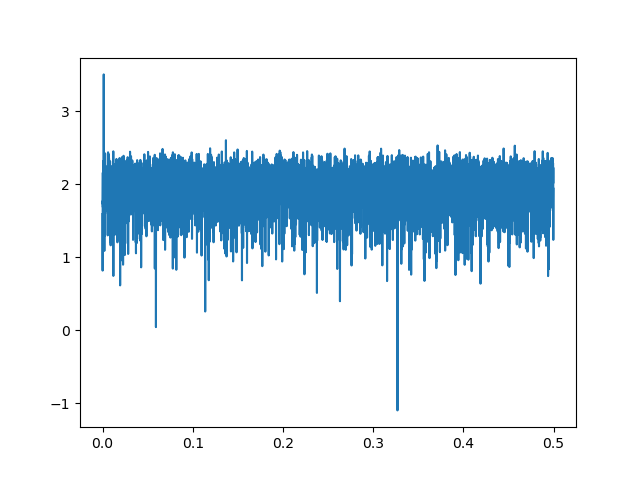

In [213]:


plt.figure()
plt.plot(freqs_inverseMin, np.log10(np.abs(np.fft.rfft(noisySignal)))[1:])
#plt.xlim(0,.01)
plt.show()